In [58]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sns.set(style="ticks")

In [59]:
data = pd.read_csv('datasets/Beer.csv')
data['Temperatura Media (C)'] = [float(str(val).replace(',','.')) for val in data['Temperatura Media (C)']]
data['Temperatura Minima (C)'] = [float(str(val).replace(',','.')) for val in data['Temperatura Minima (C)']]
data['Temperatura Maxima (C)'] = [float(str(val).replace(',','.')) for val in data['Temperatura Maxima (C)']]
data['Precipitacao (mm)'] = [float(str(val).replace(',','.')) for val in data['Precipitacao (mm)']]

In [60]:
data = data.rename(index=float, columns={'Data':'Дата','Temperatura Media (C)': "Температура сред. (С)", 'Temperatura Minima (C)':'Температура мин. (С)','Temperatura Maxima (C)':'Температура макс. (С)', 'Precipitacao (mm)':' Количество осадков (мм)', 'Final de Semana': "Выходной", 'Consumo de cerveja (litros)': 'Выпито пива (литров)'})
data.head()

,Дата,Температура сред. (С),Температура мин. (С),Температура макс. (С),Количество осадков (мм),Выходной,Выпито пива (литров)
0.0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1.0,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2.0,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3.0,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4.0,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [61]:
data.isnull().sum()

Дата                        576
Температура сред. (С)       576
Температура мин. (С)        576
Температура макс. (С)       576
 Количество осадков (мм)    576
Выходной                    576
Выпито пива (литров)        576
dtype: int64

In [62]:
# Удаление строк, содержащих пустые значения
data = data.dropna(axis=0, how='any')
data = data.drop(['Дата'], axis=1)

In [63]:
dt_train, dt_test = train_test_split(data)

In [64]:
dt_test = dt_test.drop(['Выпито пива (литров)'], axis=1)

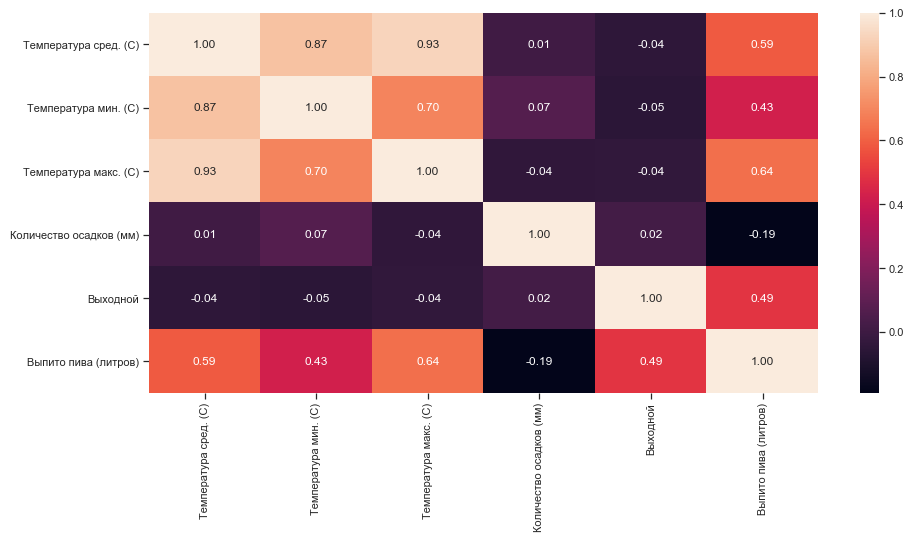

In [65]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(dt_train.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

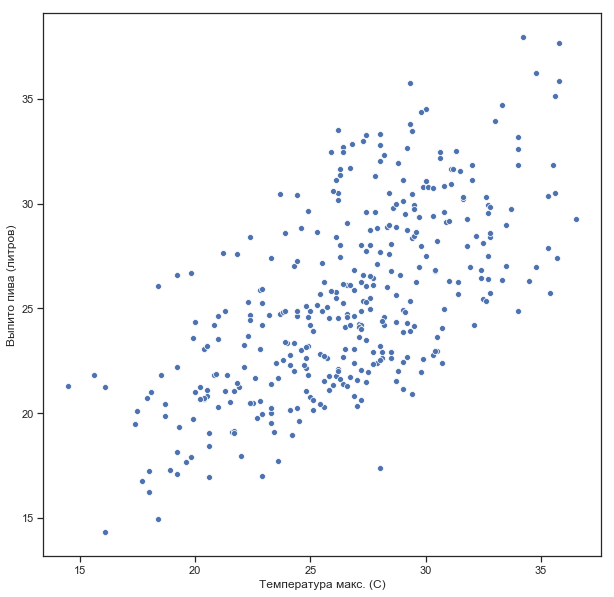

In [66]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Температура макс. (С)', y='Выпито пива (литров)', data=data)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    data['Выпито пива (литров)'], 
                                                    random_state=42)

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

1.0
1.0


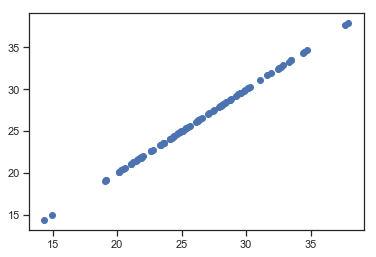

In [70]:
# Линейная модель
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

In [71]:
# SVM
from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=100).fit(X_train_scaled, y_train)
print(linear_svr.score(X_train_scaled, y_train))
print(linear_svr.score(X_test_scaled, y_test))

0.999999999301266
0.9999999993869901


In [72]:
# Дерево решений
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
print(tree_reg.score(X_train, y_train))
print(tree_reg.score(X_test, y_test))

1.0
0.9937562432994332


## Подбор гиперпараметра

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid  = {
    'alpha': np.logspace(-7, 5, 13)
}

In [76]:
from sklearn import linear_model

reg = linear_model.Ridge()
reg_grid = GridSearchCV(reg, param_grid, cv=10)
reg_grid.fit(X_train, y_train)

print("Lenear model accuracy :",reg_grid.best_score_)

accuracy : 1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [77]:
lasso = linear_model.Lasso()
lasso_grid = GridSearchCV(reg, param_grid, cv=10)
lasso_grid.fit(X_train_scaled, y_train)

print("Tree accuracy :",lasso_grid.best_score_)

accuracy : 0.9999999999999998


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [78]:
param_grid = {
    'C': np.logspace(-7, 7, 15),
}

lin_svr = LinearSVR()
svr_grid = GridSearchCV(lin_svr, param_grid, cv=5)
svr_grid.fit(X_train_scaled, y_train)

print("SVM accuracy :",svr_grid.best_score_)

accuracy : 0.9999999989445766


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
